In [1]:
from IPython.core.display import display, HTML; display(HTML("<style>.container{width:90% !important;}</style>")) 

/tmp/ipykernel_81766/3870585876.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML; display(HTML("<style>.container{width:90% !important;}</style>"))


# Pandas – wprowadzenie
###### Zastosowania biblioteki pandas
- służy do pracy z danymi tabelarycznymi. Jest być może najbardziej podstawowym narzędziem dotyczącym data science w Pythonie
- większość danych z jakimi mamy do czynienia podczas początków nauki uczenia maszynowego to dane tabelaryczne i pandas jest tam często wykorzystywaną biblioteką

## Podstawowe typy danych

In [2]:
import pandas as pd

### Series

Series, czyli szereg, jest typem danych, który można interpretować jako pojedyncza kolumna w tabeli - ma nazwę oraz listę wartości. Nazwa nie jest obowiązkowa.

Dokumentacja:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

In [3]:
my_list = [8, 2, -3, 0, 1]
my_name = "liczby"

pd.Series(data=my_list, name=my_name)

0    8
1    2
2   -3
3    0
4    1
Name: liczby, dtype: int64

In [4]:
pd.Series(my_list)  # data= jest nieobowiązkowe, ponieważ 'data' to pierwszy argument

0    8
1    2
2   -3
3    0
4    1
dtype: int64

In [5]:
my_series = pd.Series(my_list)
type(my_series)

pandas.core.series.Series

In [6]:
my_series.dtype

dtype('int64')

Indeksy szeregu można zmienić. Domyślnie są to liczby całkowite 0, 1, 2, ...

In [7]:
index_labels = ["a", "b", "c", "d", "e"]

pd.Series(my_list, index=index_labels)

a    8
b    2
c   -3
d    0
e    1
dtype: int64

In [8]:
my_series.index

RangeIndex(start=0, stop=5, step=1)

In [9]:
pd.Series(my_list, index=index_labels).index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

---
Series można utworzyć również z wektora numpy

In [3]:
import numpy as np 
array = np.array([5, 6, 7, 8, 9])
pd.Series(array)

0    5
1    6
2    7
3    8
4    9
dtype: int64

Series może zawierać różne typy danych, również stringi

In [11]:
pd.Series(["a", "b", "c", "d", "e"])

0    a
1    b
2    c
3    d
4    e
dtype: object

### DataFrame

DataFrame to typ danych, który można utożsamić z tabelą. Każda jej kolumna to odrębny Series.

Dokumentacja:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

Istnieje kilka sposobów na utworzenie data frame'a. Można zrobić to na przykład na bazie słownika. Listy, które stanowią wartości słownika to kolumny a nie wiersze.

In [12]:
my_dict = {"a": [12, 23, 34], "b": [45, 56, 67]}

my_df = pd.DataFrame(my_dict)
my_df

,a,b
0,12,45
1,23,56
2,34,67


In [13]:
type(my_df)

pandas.core.frame.DataFrame

Możemy również zdefiniować indeks df-a (analogicznie jak dla series)

In [14]:
my_df = pd.DataFrame(my_dict, index=[1, 2, 3])
my_df

,a,b
1,12,45
2,23,56
3,34,67


Dataframe można utworzyć również z macierzy numpy, jednak korzysta się z tego radziej. Poniżej składnia tego jak stworzyć df z arraya

`df = pd.DataFrame(<np.array>, columns=<list>, index=<list>)`

---

Typ DataFrame jest najczęściej wykorzystywany do analizy danych tabelarycznych. Jeśli chcemy analizować takie dane to zwykle mamy je dostarczone, np. w pliku o rozszerzeniu .csv (comma separated values). Wykorzystajmy dołączony plik .csv żeby utworzyć DataFrame

In [3]:
df = pd.read_csv("data/cars.csv")   # więcej info w dokumentacji --> https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [16]:
df.head()

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,1598.0,Diesel,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,32500,PLN,BMW,Kompakt,1598.0,Diesel,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00


In [17]:
df.head(7)

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,1598.0,Diesel,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,32500,PLN,BMW,Kompakt,1598.0,Diesel,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00
5,19400,PLN,BMW,Kombi,2497.0,Benzyna+LPG,Tył,177.0,True,2005,Niemcy,274000.0,Czarny,BMW Seria 5 523i,2021-02-28 12:52:00
6,106600,PLN,Renault,SUV,1332.0,Benzyna,Przód,140.0,False,2020,Polska,7.0,Szary,Renault Kadjar 1.3,2021-02-28 12:56:00


In [18]:
df.tail()

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
99995,83990,PLN,Ford,Kombi,1499.0,Diesel,Przód,120.0,True,2020,NaN,5.0,Srebrny,Ford Focus,2021-04-21 14:58:00
99996,7400,PLN,Audi,Kombi,1781.0,Benzyna,Przód,125.0,True,1999,Niemcy,259000.0,Niebieski,Audi A4 Avant,2021-04-21 19:45:00
99997,30000,PLN,BMW,Sedan,3901.0,Diesel,Tył,245.0,False,1999,NaN,307000.0,Inny kolor,BMW Seria 7 740d,2021-04-21 15:53:00
99998,69000,PLN,Peugeot,Auta małe,1199.0,Benzyna,Przód,101.0,True,2020,NaN,1000.0,Biały,Peugeot 208 PureTech,2021-04-21 13:42:00
99999,18000,PLN,Volkswagen,Sedan,1390.0,Benzyna,Przód,140.0,True,2007,Szwajcaria,165600.0,Szary,Volkswagen Touran 1.4,2021-04-21 13:03:00


In [19]:
type(df)

pandas.core.frame.DataFrame

###### Zadanie 1

Utwórz listę liczb a następnie na jej podstawie utwórz szereg. Przypisz mu jako indeks liczby całkowite rozpoczynające się od 1.

In [20]:
my_list = list(range(1,11))
ds = pd.Series(my_list)

ds.index += 1

print(ds)

1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
dtype: int64


###### Zadanie 2

Utwórz słownik zawierający informacje o studentach posiadający klucze "imię", "wiek", "rok studiów" oraz "średnia ocen" którego wartościami będą listy zawierające fikcyjne dane dla kilku osób. Na podstawie tego słownika utwórz data frame.

In [34]:
my_dict = {"imię": ['Adam', 'Michał', 'Tomek'], "wiek": [45, 56, 67], "rok studiów": [4, 5, 2], "śrendnia ocen": [4.5, 4.6, 3.7]}
df2 = pd.DataFrame(my_dict)
df2

,imię,wiek,rok studiów,śrendnia ocen
0,Adam,45,4,4.5
1,Michał,56,5,4.6
2,Tomek,67,2,3.7


###### Zadanie 3:
Wczytaj data frame z pliku `cars.csv` wybierając za pomocą parametru `usecols` jedynie kolumny `price`, `drive` oraz `gearbox_is_manual`. Sprawdź co się stanie jeśli zmienisz separator (parametr `sep`) na średnik.

In [14]:
df = pd.read_csv("data/cars.csv", usecols = ["price", "drive", "gearbox_is_manual"])
df

,price,drive,gearbox_is_manual
0,32900,Przód,True
1,32500,Tył,True
2,7900,Przód,True
3,39990,Przód,True
4,42900,Przód,True
...,...,...,...
99995,83990,Przód,True
99996,7400,Przód,True
99997,30000,Tył,False
99998,69000,Przód,True


## Poznawanie zawartości data frame'a
Data frame'y zawierają zwykle duże ilości danych. Nie jest możliwe ogarnięcie całości tych danych, więc żeby lepiej zrozumieć co kryje się wewnątrz stosujemy pewne metody pozwalające zrozumieć dane.

### Sprawdzanie kształtu, typów oraz nazw kolumn

In [16]:
df.shape       # ile wierszy, ile kolumn

(100000, 15)

In [17]:
len(df)        # długość czyli liczba wierszy

100000

In [18]:
df.columns     # lista kolumn

Index(['price', 'currency', 'brand', 'body', 'engine_vol', 'fuel', 'drive',
       'power', 'gearbox_is_manual', 'prod_year', 'orig_country', 'mileage',
       'color', 'title', 'offer_timestamp'],
      dtype='object')

In [19]:
df.index       # informacje o indeksie

RangeIndex(start=0, stop=100000, step=1)

In [20]:
df.dtypes      # dtypes czyli data types - typy danych poszczególnych kolumn. 'Object' to w tym przypadku tekst (string)

price                  int64
currency              object
brand                 object
body                  object
engine_vol           float64
fuel                  object
drive                 object
power                float64
gearbox_is_manual     object
prod_year              int64
orig_country          object
mileage              float64
color                 object
title                 object
offer_timestamp       object
dtype: object

In [21]:
df.isna()     # brakujące wartości

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [22]:
df.isna().sum()

price                    0
currency                 0
brand                    0
body                     0
engine_vol             699
fuel                     0
drive                19919
power                  672
gearbox_is_manual      607
prod_year                0
orig_country         44509
mileage                172
color                    0
title                    0
offer_timestamp          0
dtype: int64

In [23]:
df.isna().sum().sum()

66578

In [24]:
pd.isnull(132)

False

In [25]:
pd.isnull(np.nan)

True

In [26]:
pd.isnull(None)

True

In [27]:
pd.isnull("")

False

In [28]:
df.describe()  # dla kolumn numerycznych - statystyki opisowe: liczebność, średnia, odchylenie standardowe itp.

,price,engine_vol,power,prod_year,mileage
count,1.000000e+05,99301.000000,99328.000000,100000.000000,9.982800e+04
mean,3.949909e+04,1802.313904,136.591575,2010.935530,1.594466e+05
std,1.432028e+05,598.744998,54.965202,5.820637,4.091146e+05
min,5.850000e+02,400.000000,1.000000,1900.000000,1.000000e+00
25%,1.540000e+04,1461.000000,102.000000,2007.000000,9.346000e+04
50%,2.690000e+04,1686.000000,129.000000,2011.000000,1.600045e+05
75%,4.950000e+04,1995.000000,150.000000,2015.000000,2.150770e+05
max,1.432083e+07,8200.000000,1203.000000,2021.000000,1.234568e+08


In [29]:
df.memory_usage()    # pamięć zajmowana przez poszczególne kolumny w bajtach

Index                   128
price                800000
currency             800000
brand                800000
body                 800000
engine_vol           800000
fuel                 800000
drive                800000
power                800000
gearbox_is_manual    800000
prod_year            800000
orig_country         800000
mileage              800000
color                800000
title                800000
offer_timestamp      800000
dtype: int64

In [30]:
df.memory_usage().sum()

12000128

In [31]:
df.info()     # połączenie type(), .index, .isnull(), .dtypes oraz .memory_usage()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              100000 non-null  int64  
 1   currency           100000 non-null  object 
 2   brand              100000 non-null  object 
 3   body               100000 non-null  object 
 4   engine_vol         99301 non-null   float64
 5   fuel               100000 non-null  object 
 6   drive              80081 non-null   object 
 7   power              99328 non-null   float64
 8   gearbox_is_manual  99393 non-null   object 
 9   prod_year          100000 non-null  int64  
 10  orig_country       55491 non-null   object 
 11  mileage            99828 non-null   float64
 12  color              100000 non-null  object 
 13  title              100000 non-null  object 
 14  offer_timestamp    100000 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 11

###### Zadanie 1
Wykonaj powyżej przedstawione operacje na data framie utworzonym ręcznie w jednym z poprzednich zadań

In [35]:
df2.shape       # ile wierszy, ile kolumn

(3, 4)

In [36]:
len(df2)        # długość czyli liczba wierszy

3

In [37]:
df2.columns     # lista kolumn

Index(['imię', 'wiek', 'rok studiów', 'śrendnia ocen'], dtype='object')

In [38]:
df2.index       # informacje o indeksie

RangeIndex(start=0, stop=3, step=1)

In [39]:
df2.dtypes      # dtypes czyli data types - typy danych poszczególnych kolumn. 'Object' to w tym przypadku tekst (string)

imię              object
wiek               int64
rok studiów        int64
śrendnia ocen    float64
dtype: object

In [40]:
df2.isna()     # brakujące wartości

,imię,wiek,rok studiów,śrendnia ocen
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False


In [41]:
df2.isna().sum()

imię             0
wiek             0
rok studiów      0
śrendnia ocen    0
dtype: int64

In [42]:
df2.isna().sum().sum()

0

In [43]:
df2.describe()  # dla kolumn numerycznych - statystyki opisowe: liczebność, średnia, odchylenie standardowe itp.

,wiek,rok studiów,śrendnia ocen
count,3.0,3.000000,3.000000
mean,56.0,3.666667,4.266667
std,11.0,1.527525,0.493288
min,45.0,2.000000,3.700000
25%,50.5,3.000000,4.100000
50%,56.0,4.000000,4.500000
75%,61.5,4.500000,4.550000
max,67.0,5.000000,4.600000


In [44]:
df2.memory_usage()    # pamięć zajmowana przez poszczególne kolumny w bajtach

Index            128
imię              24
wiek              24
rok studiów       24
śrendnia ocen     24
dtype: int64

In [45]:
df2.memory_usage().sum()

224

In [46]:
df2.info()     # połączenie type(), .index, .isnull(), .dtypes oraz .memory_usage()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imię           3 non-null      object 
 1   wiek           3 non-null      int64  
 2   rok studiów    3 non-null      int64  
 3   śrendnia ocen  3 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 224.0+ bytes


### Wyciąganie poszczególnych kolumn, wierszy oraz pojedynczych wartości

#### Wyciąganie pojedynczej kolumny

In [47]:
df["mileage"]

0         175000.0
1         228000.0
2        2610000.0
3         138123.0
4         175962.0
           ...    
99995          5.0
99996     259000.0
99997     307000.0
99998       1000.0
99999     165600.0
Name: mileage, Length: 100000, dtype: float64

In [48]:
type(df["mileage"])   # nie daje nam to informacji o tym jakiego typu są dane w szeregu

pandas.core.series.Series

In [49]:
df.mileage

0         175000.0
1         228000.0
2        2610000.0
3         138123.0
4         175962.0
           ...    
99995          5.0
99996     259000.0
99997     307000.0
99998       1000.0
99999     165600.0
Name: mileage, Length: 100000, dtype: float64

#### Wyciąganie kilku kolumn

In [50]:
df[["body", "color", "title"]]

,body,color,title
0,Sedan,Srebrny,Škoda RAPID
1,Kompakt,Biały,BMW Seria 1 116d
2,Auta małe,Szary,Fiat Panda 1.2
3,SUV,Szary,Kia Sportage 1.7
4,SUV,Biały,Kia Sportage
...,...,...,...
99995,Kombi,Srebrny,Ford Focus
99996,Kombi,Niebieski,Audi A4 Avant
99997,Sedan,Inny kolor,BMW Seria 7 740d
99998,Auta małe,Biały,Peugeot 208 PureTech


In [51]:
type(df[["body", "color", "title"]])

pandas.core.frame.DataFrame

In [52]:
df[["color"]]

,color
0,Srebrny
1,Biały
2,Szary
3,Szary
4,Biały
...,...
99995,Srebrny
99996,Niebieski
99997,Inny kolor
99998,Biały


In [53]:
type(df[["color"]])

pandas.core.frame.DataFrame

#### Wyciąganie kolumn na podstawie ich indeksu

In [54]:
df.columns

Index(['price', 'currency', 'brand', 'body', 'engine_vol', 'fuel', 'drive',
       'power', 'gearbox_is_manual', 'prod_year', 'orig_country', 'mileage',
       'color', 'title', 'offer_timestamp'],
      dtype='object')

In [55]:
df.columns[4]

'engine_vol'

In [56]:
df["engine_vol"]

0        1598.0
1        1598.0
2        1242.0
3        1685.0
4        1685.0
          ...  
99995    1499.0
99996    1781.0
99997    3901.0
99998    1199.0
99999    1390.0
Name: engine_vol, Length: 100000, dtype: float64

In [57]:
df[df.columns[4]]

0        1598.0
1        1598.0
2        1242.0
3        1685.0
4        1685.0
          ...  
99995    1499.0
99996    1781.0
99997    3901.0
99998    1199.0
99999    1390.0
Name: engine_vol, Length: 100000, dtype: float64

#### Wyciąganie kolumn na podstawie ich typu

In [58]:
df.select_dtypes(["float", "int"])

,price,engine_vol,power,prod_year,mileage
0,32900,1598.0,115.0,2017,175000.0
1,32500,1598.0,116.0,2012,228000.0
2,7900,1242.0,69.0,2012,2610000.0
3,39990,1685.0,115.0,2012,138123.0
4,42900,1685.0,115.0,2012,175962.0
...,...,...,...,...,...
99995,83990,1499.0,120.0,2020,5.0
99996,7400,1781.0,125.0,1999,259000.0
99997,30000,3901.0,245.0,1999,307000.0
99998,69000,1199.0,101.0,2020,1000.0


###### Zadanie 1
Na podstawie wczytanego z pliku csv data frame'a utwórz mniejszy df zawierający jedynie kolumny `fuel`, `price`, `mileage` oraz `brand`

In [63]:
df[["fuel", "price", "mileage", "brand"]]

,fuel,price,mileage,brand
0,Diesel,32900,175000.0,Škoda
1,Diesel,32500,228000.0,BMW
2,Benzyna,7900,2610000.0,Fiat
3,Diesel,39990,138123.0,Kia
4,Diesel,42900,175962.0,Kia
...,...,...,...,...
99995,Diesel,83990,5.0,Ford
99996,Benzyna,7400,259000.0,Audi
99997,Diesel,30000,307000.0,BMW
99998,Benzyna,69000,1000.0,Peugeot


###### Zadanie 2
Utwórz series zawierający dane, które znajdują się w kolumnie `offer_timestamp`

In [64]:
df["offer_timestamp"]

0        2021-02-28 12:53:00
1        2021-02-28 12:52:00
2        2021-02-28 12:50:00
3        2021-02-28 12:57:00
4        2021-02-28 12:50:00
                ...         
99995    2021-04-21 14:58:00
99996    2021-04-21 19:45:00
99997    2021-04-21 15:53:00
99998    2021-04-21 13:42:00
99999    2021-04-21 13:03:00
Name: offer_timestamp, Length: 100000, dtype: object

In [65]:
type(df["offer_timestamp"])

pandas.core.series.Series

#### Wyciąganie wierszy

In [66]:
df.iloc[0]  # iloc - liczba porządkowa wiersza: wiersz zerowy, pierwszy, drugi itp.

price                              32900
currency                             PLN
brand                              Škoda
body                               Sedan
engine_vol                        1598.0
fuel                              Diesel
drive                              Przód
power                              115.0
gearbox_is_manual                   True
prod_year                           2017
orig_country                      Polska
mileage                         175000.0
color                            Srebrny
title                        Škoda RAPID
offer_timestamp      2021-02-28 12:53:00
Name: 0, dtype: object

In [67]:
df.iloc[4]

price                              42900
currency                             PLN
brand                                Kia
body                                 SUV
engine_vol                        1685.0
fuel                              Diesel
drive                              Przód
power                              115.0
gearbox_is_manual                   True
prod_year                           2012
orig_country                         NaN
mileage                         175962.0
color                              Biały
title                       Kia Sportage
offer_timestamp      2021-02-28 12:50:00
Name: 4, dtype: object

In [68]:
df.loc[4]  # loc - nazwa wiersza. W tym przypadku wiersze nazywają się tak samo ich numer porządkowy, 
           #        ale nie zawsze musi tak być. Zobacz poniższy przykład

price                              42900
currency                             PLN
brand                                Kia
body                                 SUV
engine_vol                        1685.0
fuel                              Diesel
drive                              Przód
power                              115.0
gearbox_is_manual                   True
prod_year                           2012
orig_country                         NaN
mileage                         175962.0
color                              Biały
title                       Kia Sportage
offer_timestamp      2021-02-28 12:50:00
Name: 4, dtype: object

In [69]:
small_df = pd.DataFrame({"a": [1, 2, 3], "b": [2, 3, 4]}, index=["one", "two", "three"])

In [70]:
small_df

,a,b
one,1,2
two,2,3
three,3,4


In [71]:
small_df.iloc[1]

a    2
b    3
Name: two, dtype: int64

In [72]:
small_df.loc["two"]

a    2
b    3
Name: two, dtype: int64

In [73]:
small_df.loc[1]

KeyError: 1

#### Pojedyncze wartości oraz ich przedziały

In [74]:
df["prod_year"].iloc[3]

2012

In [75]:
df["prod_year"].loc[5]

2005

In [76]:
df["prod_year"][5]

2005

In [77]:
df.iloc[3, 9]

2012

In [78]:
df.loc[3, "prod_year"]

2012

In [79]:
df[df.columns[9]].iloc[3]

2012

In [80]:
df[df.columns[9]].loc[3]

2012

In [81]:
df['prod_year'].iloc[4:8]

4    2012
5    2005
6    2020
7    2016
Name: prod_year, dtype: int64

In [82]:
df['prod_year'].loc[4:8]

4    2012
5    2005
6    2020
7    2016
8    2015
Name: prod_year, dtype: int64

In [ ]:
df[['prod_year', 'gearbox_is_manual']].loc[4:8]

###### Zadanie 3
Wyciągnij z df-a element, który:

a) jest w kolumnie `price` i w wierszu o indeksie 5

b) jest w kolumnie `body` i w wierszu 10 z kolei

c) wszystkie dane znajdujące się w wierszach o indeksach 6-11 włącznie i w kolumnach `title` i `offer_timestamp`

In [84]:
df.loc[5, 'price']

19400

###### Zadanie 4
Wyciągnij z df-a wszystkie kolumny zawierające dane tekstowe

In [89]:
df.select_dtypes(['object'])

,currency,brand,body,fuel,drive,gearbox_is_manual,orig_country,color,title,offer_timestamp
0,PLN,Škoda,Sedan,Diesel,Przód,True,Polska,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,PLN,BMW,Kompakt,Diesel,Tył,True,NaN,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,PLN,Fiat,Auta małe,Benzyna,Przód,True,Polska,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,PLN,Kia,SUV,Diesel,Przód,True,Niemcy,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,PLN,Kia,SUV,Diesel,Przód,True,NaN,Biały,Kia Sportage,2021-02-28 12:50:00
...,...,...,...,...,...,...,...,...,...,...
99995,PLN,Ford,Kombi,Diesel,Przód,True,NaN,Srebrny,Ford Focus,2021-04-21 14:58:00
99996,PLN,Audi,Kombi,Benzyna,Przód,True,Niemcy,Niebieski,Audi A4 Avant,2021-04-21 19:45:00
99997,PLN,BMW,Sedan,Diesel,Tył,False,NaN,Inny kolor,BMW Seria 7 740d,2021-04-21 15:53:00
99998,PLN,Peugeot,Auta małe,Benzyna,Przód,True,NaN,Biały,Peugeot 208 PureTech,2021-04-21 13:42:00


### Liczenie unikalnych wartości w Series oraz DataFrame

###### `value_counts`

In [184]:
df = pd.read_csv("data/cars.csv")

In [90]:
df['currency'].value_counts()

PLN    99904
EUR       96
Name: currency, dtype: int64

In [91]:
df['fuel'].value_counts()

Benzyna        47666
Diesel         44979
Benzyna+LPG     5600
Hybryda         1502
Elektryczny      208
Benzyna+CNG       45
Name: fuel, dtype: int64

In [92]:
df['fuel'].value_counts(normalize=True)

Benzyna        0.47666
Diesel         0.44979
Benzyna+LPG    0.05600
Hybryda        0.01502
Elektryczny    0.00208
Benzyna+CNG    0.00045
Name: fuel, dtype: float64

In [93]:
df['brand'].value_counts()

Volkswagen    9097
Opel          9018
Ford          8307
Audi          7206
BMW           6709
              ... 
Baic             1
Shuanghuan       1
Mercury          1
Talbot           1
Tarpan           1
Name: brand, Length: 90, dtype: int64

In [94]:
df.value_counts()

price    currency  brand       body           engine_vol  fuel     drive  power  gearbox_is_manual  prod_year  orig_country  mileage   color      title                                                       offer_timestamp    
72578    PLN       Citroën     SUV            1199.0      Benzyna  Przód  110.0  True               2020       Polska        5.0       Biały      Citroën C3 Aircross                                         2021-03-12 12:36:00    4
107900   PLN       Volkswagen  Kombi          1498.0      Benzyna  Przód  130.0  True               2021       Polska        5.0       Srebrny    Volkswagen Golf                                             2021-03-17 10:49:00    4
69990    PLN       Kia         Kompakt        1000.0      Benzyna  Przód  100.0  True               2020       Polska        6.0       Biały      Kia Ceed                                                    2021-04-14 15:29:00    3
38900    PLN       Seat        Kombi          1598.0      Diesel   Przód  105.0  

In [95]:
df[["currency", "drive"]].value_counts()

currency  drive
PLN       Przód    72431
          Tył       7598
EUR       Przód       47
          Tył          5
dtype: int64

###### `unique` oraz `nunique`

In [96]:
df['fuel'].nunique()

6

In [97]:
df['fuel'].unique()

array(['Diesel', 'Benzyna', 'Benzyna+LPG', 'Hybryda', 'Elektryczny',
       'Benzyna+CNG'], dtype=object)

In [98]:
df.nunique()

price                 4763
currency                 2
brand                   90
body                    10
engine_vol             773
fuel                     6
drive                    2
power                  422
gearbox_is_manual        2
prod_year               76
orig_country            34
mileage              29386
color                   14
title                 6166
offer_timestamp      23189
dtype: int64

In [99]:
df.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

###### `crosstab`

In [102]:
pd.crosstab(df["currency"], df["fuel"])

fuel,Benzyna,Benzyna+CNG,Benzyna+LPG,Diesel,Elektryczny,Hybryda
currency,,,,,,
EUR,29,0,1,61,3,2
PLN,47637,45,5599,44918,205,1500


In [103]:
pd.crosstab(df["body"], df["drive"], normalize=True)

drive,Przód,Tył
body,,
Auta małe,0.031218,0.001661
Auta miejskie,0.150385,0.001798
Coupe,0.008966,0.012899
Kabriolet,0.005757,0.004321
Kombi,0.190282,0.021353
Kompakt,0.186162,0.009328
Minivan,0.126222,0.001973
SUV,0.102496,0.001848
Sedan,0.103570,0.039760


###### Zadanie 1
Stwórz listę kilku wybranych nazw kolumn. Następnie w pętli `for` przeiteruj po wszystkich tych kolumnach i wypisz ile unikalnych wartości jest w danej kolumnie

In [107]:
col_list = ['price', 'currency', 'gearbox_is_manual']
col_list

for elem in col_list:
    print(f"{elem} column has \t{df[elem].nunique()} unique values")

price column has 	4763 unique values
currency column has 	2 unique values
gearbox_is_manual column has 	2 unique values


###### Zadanie 2
Zrób to samo co w poprzednim zadaniu, ale zamiast wypisywać liczbę unikalnych wartości wypisz ich rozkład wraz z liczebnością poszczególnych elementów

In [109]:
col_list = ['price', 'currency', 'gearbox_is_manual']
col_list

for elem in col_list:
    print(f"{df[elem].value_counts()}\n\n")

19900    1301
29900    1066
15900    1064
14900    1029
18900    1014
         ... 
40836       1
93600       1
27921       1
70699       1
9956        1
Name: price, Length: 4763, dtype: int64


PLN    99904
EUR       96
Name: currency, dtype: int64


True     72953
False    26440
Name: gearbox_is_manual, dtype: int64




###### Zadanie 3
Znajdź wartość, która najczęściej pojawia się w kolumnie `body`

In [117]:
vc = df["body"].value_counts()
vc

Kombi            19950
SUV              17456
Kompakt          16997
Sedan            14189
Auta miejskie    13674
Minivan          11420
Auta małe         3098
Coupe             2285
Kabriolet          930
Pick-up              1
Name: body, dtype: int64

In [121]:
vc.idxmax()

'Kombi'

### Iterowanie po szeregu / data framie

#### Series

In [122]:
s = pd.Series([4, 3, 6, 2, 0])
s

0    4
1    3
2    6
3    2
4    0
dtype: int64

In [123]:
for idx, value in s.iteritems():
    print(idx, '--', value)

0 -- 4
1 -- 3
2 -- 6
3 -- 2
4 -- 0


#### DataFrame

In [124]:
df_ = pd.DataFrame({"a": [1, 2, 3], "b": [10, 20, 30], "c": [100, 200, 300]})

In [125]:
df_

,a,b,c
0,1,10,100
1,2,20,200
2,3,30,300


In [126]:
for idx, row in df_.iterrows():
    print(idx, '\n')
    print(row, '\n\n')

0 

a      1
b     10
c    100
Name: 0, dtype: int64 


1 

a      2
b     20
c    200
Name: 1, dtype: int64 


2 

a      3
b     30
c    300
Name: 2, dtype: int64 




###### Zadanie 1
Przeiteruj `df`. Jeśli w jakimś wierszu walutą będzie Euro wyprintuj tytuł oferty

In [128]:
df = df.head(100)
df

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,1598.0,Diesel,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,32500,PLN,BMW,Kompakt,1598.0,Diesel,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21500,PLN,Renault,Kompakt,1598.0,Benzyna+LPG,Przód,100.0,True,2011,Niemcy,147435.0,Biały,Renault Megane 1.6,2021-02-27 16:17:00
96,57000,PLN,Honda,Kombi,1798.0,Benzyna,Przód,142.0,True,2015,Polska,68000.0,Biały,Honda Civic 1.8,2021-02-27 15:12:00
97,17800,PLN,Audi,Kombi,1984.0,Benzyna,Przód,130.0,False,2005,Niemcy,226200.0,Niebieski,Audi A4 Avant,2021-02-27 22:31:00
98,28900,PLN,Škoda,Kombi,1197.0,Benzyna,Przód,105.0,True,2013,Polska,216000.0,Brązowy,Škoda Octavia 1.2,2021-02-28 01:35:00


In [167]:
for idx, row in df.iterrows():
    if row["currency"] == "EUR":
        print(row['title'])

###### Zadanie 2
Utwórz szereg z kolumny `fuel` oraz zmienną `counter`. Przeiteruj po szeregu szukając wartości innych niż "Benzyna" albo "Diesel" i za pomocą inkrementacji licznika policz wszystkie takie przypadki.

In [171]:
violation = df["fuel"]
counter = 0

for i, value in violation.iteritems():
    if value == "Benzyna" or value == "Diesel":
        counter += 1
        
print(counter)

91


###### Zadanie 3
Przeiteruj wycinek df-a taki że jego kolumny to tylko `mileage` i `offer_timestamp`. Policz za pomocą zmiennej `counter` ile ofert zostało wystawionych w lutym między godziną 2 i 3 w nocy.

In [172]:
counter = 0
for i, row in df[["mileage", "offer_timestamp"]].iterrows():
    if row["offer_timestamp"][5:7] == "02" and row["offer_timestamp"][11:13] == "02":
        counter += 1
        
print(counter)
    

0


### Wybieranie podzbiorów na podstawie warunków logicznych

In [173]:
df["prod_year"]

0     2017
1     2012
2     2012
3     2012
4     2012
      ... 
95    2011
96    2015
97    2005
98    2013
99    2013
Name: prod_year, Length: 100, dtype: int64

In [174]:
df["prod_year"]==2012

0     False
1      True
2      True
3      True
4      True
      ...  
95    False
96    False
97    False
98    False
99    False
Name: prod_year, Length: 100, dtype: bool

In [175]:
df[df["prod_year"]==2012]

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
1,32500,PLN,BMW,Kompakt,1598.0,Diesel,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00
9,36800,PLN,Volkswagen,SUV,1968.0,Diesel,NaN,140.0,True,2012,Polska,333570.0,Biały,Volkswagen Tiguan 2.0,2021-02-28 12:57:00
10,31900,PLN,Opel,Kombi,1956.0,Diesel,NaN,195.0,True,2012,Niemcy,239700.0,Czerwony,Opel Insignia 2.0,2021-02-28 12:56:00
12,46901,PLN,Audi,SUV,1995.0,Diesel,NaN,140.0,True,2012,Niemcy,224000.0,Biały,Audi Q3,2021-02-28 12:50:00
62,27900,PLN,Ford,Kompakt,1596.0,Benzyna,Przód,105.0,True,2012,Niemcy,120000.0,Niebieski,Ford Focus 1.6,2021-02-27 19:09:00
66,37900,PLN,Renault,Kombi,1997.0,Benzyna,Przód,140.0,True,2012,Niemcy,77644.0,Szary,Niski przebieg\n\n\n\n Renault Laguna,2021-02-27 18:07:00
71,17600,PLN,Opel,Auta miejskie,1229.0,Benzyna,Przód,70.0,True,2012,NaN,80000.0,Inny kolor,Niski przebieg\n\n\n\n Opel Corsa 1.2,2021-02-27 22:15:00


In [176]:
df[df["prod_year"]==2012]["body"]

1           Kompakt
2         Auta małe
3               SUV
4               SUV
9               SUV
10            Kombi
12              SUV
62          Kompakt
66            Kombi
71    Auta miejskie
72          Kompakt
90          Minivan
Name: body, dtype: object

In [177]:
df[df["prod_year"]==2012]["body"].value_counts()  # przy okazji sprawdźmy rozkład wartości

SUV              4
Kompakt          3
Kombi            2
Auta małe        1
Auta miejskie    1
Minivan          1
Name: body, dtype: int64

In [178]:
df[df["prod_year"]==2019]["body"].value_counts()

Kompakt          1
Auta miejskie    1
SUV              1
Auta małe        1
Name: body, dtype: int64

In [179]:
df[df["prod_year"]==1999]["body"].value_counts()

Series([], Name: body, dtype: int64)

---

In [180]:
df[df["prod_year"] < 2016]

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
1,32500,PLN,BMW,Kompakt,1598.0,Diesel,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00
5,19400,PLN,BMW,Kombi,2497.0,Benzyna+LPG,Tył,177.0,True,2005,Niemcy,274000.0,Czarny,BMW Seria 5 523i,2021-02-28 12:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21500,PLN,Renault,Kompakt,1598.0,Benzyna+LPG,Przód,100.0,True,2011,Niemcy,147435.0,Biały,Renault Megane 1.6,2021-02-27 16:17:00
96,57000,PLN,Honda,Kombi,1798.0,Benzyna,Przód,142.0,True,2015,Polska,68000.0,Biały,Honda Civic 1.8,2021-02-27 15:12:00
97,17800,PLN,Audi,Kombi,1984.0,Benzyna,Przód,130.0,False,2005,Niemcy,226200.0,Niebieski,Audi A4 Avant,2021-02-27 22:31:00
98,28900,PLN,Škoda,Kombi,1197.0,Benzyna,Przód,105.0,True,2013,Polska,216000.0,Brązowy,Škoda Octavia 1.2,2021-02-28 01:35:00


In [183]:
df[df["prod_year"] < 2016][["body"]]  # warto zwrócić uwagę na podwójne nawiasy - wynik to dataframe o jednej kolumnie a nie series

,body
1,Kompakt
2,Auta małe
3,SUV
4,SUV
5,Kombi
...,...
95,Kompakt
96,Kombi
97,Kombi
98,Kombi


---

In [ ]:
df[(df["prod_year"] < 2016) & (df["price"] > 100000)]    # łącząc warunki logiczne używamy spójników & oraz |

###### Zadanie 1
Wyciągnij informacje o ofertach w których skrzynia biegów jest manualna

In [196]:
df[df["gearbox_is_manual"]==True]

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,1598.0,Diesel,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,32500,PLN,BMW,Kompakt,1598.0,Diesel,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,59900,PLN,Škoda,Sedan,1395.0,Benzyna,Przód,150.0,True,2017,NaN,99300.0,Czarny,Škoda Octavia 1.4,2021-04-21 22:25:00
99995,83990,PLN,Ford,Kombi,1499.0,Diesel,Przód,120.0,True,2020,NaN,5.0,Srebrny,Ford Focus,2021-04-21 14:58:00
99996,7400,PLN,Audi,Kombi,1781.0,Benzyna,Przód,125.0,True,1999,Niemcy,259000.0,Niebieski,Audi A4 Avant,2021-04-21 19:45:00
99998,69000,PLN,Peugeot,Auta małe,1199.0,Benzyna,Przód,101.0,True,2020,NaN,1000.0,Biały,Peugeot 208 PureTech,2021-04-21 13:42:00


###### Zadanie 2
Znajdź samochody z silnikiem diesla których przebieg jest mniejszy niż 50000

In [197]:
df[df["mileage"] < 50000]

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
6,106600,PLN,Renault,SUV,1332.0,Benzyna,Przód,140.0,False,2020,Polska,7.0,Szary,Renault Kadjar 1.3,2021-02-28 12:56:00
7,32900,PLN,Dacia,Kombi,1598.0,Benzyna,Przód,102.0,True,2016,Polska,42771.0,Biały,Dacia Dokker Van,2021-02-28 12:57:00
23,59000,PLN,Jeep,SUV,3604.0,Benzyna,NaN,286.0,False,2015,Stany Zjednoczone,26625.0,Bordowy,Niski przebieg\n\n\n\n Jeep Grand C...,2021-02-28 12:53:00
24,35500,PLN,Mazda,Kompakt,1998.0,Benzyna,Przód,122.0,True,2019,NaN,18000.0,Bordowy,Mazda 3 2.0,2021-02-28 12:54:00
31,74500,PLN,Renault,Auta miejskie,1332.0,Benzyna,Przód,140.0,True,2020,Polska,2500.0,Szary,Renault Megane 1.3,2021-02-28 12:57:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99978,59900,PLN,Peugeot,SUV,1199.0,Benzyna,Przód,110.0,True,2019,NaN,13000.0,Czarny,Peugeot 2008 1.2,2021-04-21 15:03:00
99986,49900,PLN,Toyota,Kompakt,998.0,Benzyna,Przód,72.0,False,2020,Polska,4903.0,Czarny,Toyota Aygo,2021-04-21 15:42:00
99989,76900,PLN,Ford,Kombi,1498.0,Diesel,Przód,95.0,True,2019,Polska,10.0,Biały,Ford Focus 1.5,2021-04-21 13:34:00
99995,83990,PLN,Ford,Kombi,1499.0,Diesel,Przód,120.0,True,2020,NaN,5.0,Srebrny,Ford Focus,2021-04-21 14:58:00


###### Zadanie 3
Znajdź samochody marki "Toyota" lub takie, które mają napęd na przód

In [201]:
df[(df["brand"] == 'Toyota') | (df["drive"] == 'Przód')]

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,1598.0,Diesel,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00
6,106600,PLN,Renault,SUV,1332.0,Benzyna,Przód,140.0,False,2020,Polska,7.0,Szary,Renault Kadjar 1.3,2021-02-28 12:56:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,59900,PLN,Škoda,Sedan,1395.0,Benzyna,Przód,150.0,True,2017,NaN,99300.0,Czarny,Škoda Octavia 1.4,2021-04-21 22:25:00
99995,83990,PLN,Ford,Kombi,1499.0,Diesel,Przód,120.0,True,2020,NaN,5.0,Srebrny,Ford Focus,2021-04-21 14:58:00
99996,7400,PLN,Audi,Kombi,1781.0,Benzyna,Przód,125.0,True,1999,Niemcy,259000.0,Niebieski,Audi A4 Avant,2021-04-21 19:45:00
99998,69000,PLN,Peugeot,Auta małe,1199.0,Benzyna,Przód,101.0,True,2020,NaN,1000.0,Biały,Peugeot 208 PureTech,2021-04-21 13:42:00


### Rysowanie wykresów

<AxesSubplot:>

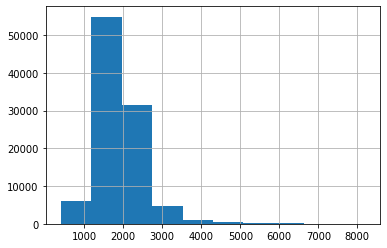

In [202]:
df["engine_vol"].hist()

<AxesSubplot:>

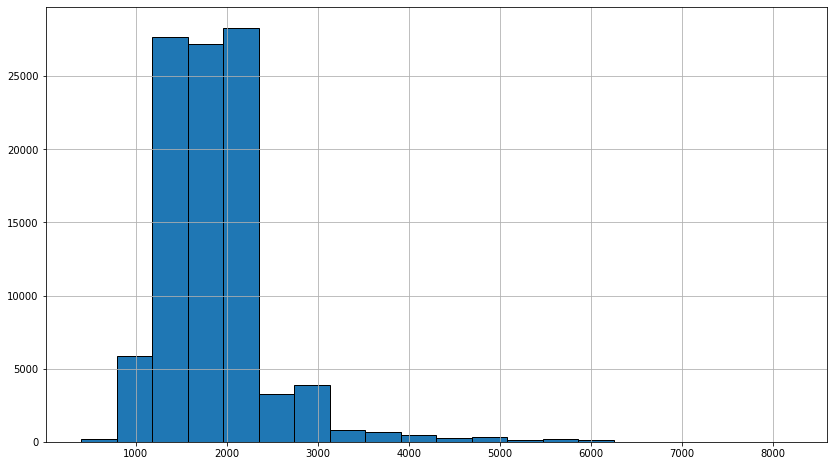

In [203]:
df["engine_vol"].hist(figsize=(14, 8), bins=20, edgecolor='black')

<AxesSubplot:title={'center':'Column b'}>

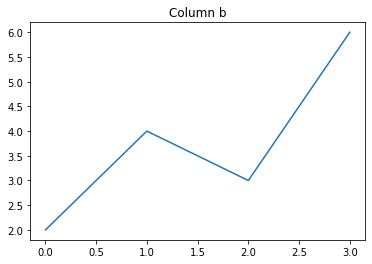

In [204]:
pd.DataFrame({"a": [1, 2, 3, 4], "b": [2, 4, 3, 6]})["b"].plot(title="Column b")

<AxesSubplot:title={'center':'Column b'}, xlabel='a', ylabel='b'>

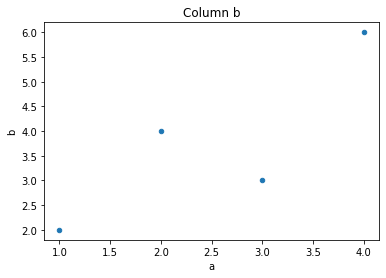

In [205]:
pd.DataFrame({"a": [1, 2, 3, 4], "b": [2, 4, 3, 6]}).plot(title="Column b", marker='o', kind='scatter', x='a', y='b')

## Podstawowe operacje na data frame'ach
### Modyfikacja istniejących wartości

#### nadpisanie

In [206]:
df.loc[0, "engine_vol"] = 123

In [207]:
df.head()

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,123.0,Diesel,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,32500,PLN,BMW,Kompakt,1598.0,Diesel,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00


#### replace

In [208]:
df.replace("Diesel", "Olej napędowy")

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,123.0,Olej napędowy,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,32500,PLN,BMW,Kompakt,1598.0,Olej napędowy,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Olej napędowy,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Olej napędowy,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,83990,PLN,Ford,Kombi,1499.0,Olej napędowy,Przód,120.0,True,2020,NaN,5.0,Srebrny,Ford Focus,2021-04-21 14:58:00
99996,7400,PLN,Audi,Kombi,1781.0,Benzyna,Przód,125.0,True,1999,Niemcy,259000.0,Niebieski,Audi A4 Avant,2021-04-21 19:45:00
99997,30000,PLN,BMW,Sedan,3901.0,Olej napędowy,Tył,245.0,False,1999,NaN,307000.0,Inny kolor,BMW Seria 7 740d,2021-04-21 15:53:00
99998,69000,PLN,Peugeot,Auta małe,1199.0,Benzyna,Przód,101.0,True,2020,NaN,1000.0,Biały,Peugeot 208 PureTech,2021-04-21 13:42:00


In [209]:
df.head()

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,123.0,Diesel,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,32500,PLN,BMW,Kompakt,1598.0,Diesel,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00


In [210]:
df.replace({"Diesel": "Olej napędowy"})

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,123.0,Olej napędowy,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,32500,PLN,BMW,Kompakt,1598.0,Olej napędowy,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Olej napędowy,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Olej napędowy,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,83990,PLN,Ford,Kombi,1499.0,Olej napędowy,Przód,120.0,True,2020,NaN,5.0,Srebrny,Ford Focus,2021-04-21 14:58:00
99996,7400,PLN,Audi,Kombi,1781.0,Benzyna,Przód,125.0,True,1999,Niemcy,259000.0,Niebieski,Audi A4 Avant,2021-04-21 19:45:00
99997,30000,PLN,BMW,Sedan,3901.0,Olej napędowy,Tył,245.0,False,1999,NaN,307000.0,Inny kolor,BMW Seria 7 740d,2021-04-21 15:53:00
99998,69000,PLN,Peugeot,Auta małe,1199.0,Benzyna,Przód,101.0,True,2020,NaN,1000.0,Biały,Peugeot 208 PureTech,2021-04-21 13:42:00


In [211]:
df.replace("Diesel", "Olej napędowy", inplace=True)

In [212]:
df.head()

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,123.0,Olej napędowy,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,32500,PLN,BMW,Kompakt,1598.0,Olej napędowy,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Olej napędowy,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Olej napędowy,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00


In [213]:
df["drive"].replace("Przód", "Przedni", inplace=True)

In [214]:
df.head()

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,123.0,Olej napędowy,Przedni,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,32500,PLN,BMW,Kompakt,1598.0,Olej napędowy,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przedni,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Olej napędowy,Przedni,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Olej napędowy,Przedni,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00


#### rename

In [215]:
df.rename({'brand': 'marka', 'currency': 'waluta'}, axis='columns')  # axis=1

,price,waluta,marka,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,123.0,Olej napędowy,Przedni,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,32500,PLN,BMW,Kompakt,1598.0,Olej napędowy,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przedni,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Olej napędowy,Przedni,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Olej napędowy,Przedni,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,83990,PLN,Ford,Kombi,1499.0,Olej napędowy,Przedni,120.0,True,2020,NaN,5.0,Srebrny,Ford Focus,2021-04-21 14:58:00
99996,7400,PLN,Audi,Kombi,1781.0,Benzyna,Przedni,125.0,True,1999,Niemcy,259000.0,Niebieski,Audi A4 Avant,2021-04-21 19:45:00
99997,30000,PLN,BMW,Sedan,3901.0,Olej napędowy,Tył,245.0,False,1999,NaN,307000.0,Inny kolor,BMW Seria 7 740d,2021-04-21 15:53:00
99998,69000,PLN,Peugeot,Auta małe,1199.0,Benzyna,Przedni,101.0,True,2020,NaN,1000.0,Biały,Peugeot 208 PureTech,2021-04-21 13:42:00


In [216]:
df.rename({'brand': 'marka', 'currency': 'waluta'}, inplace=True, axis='columns')

In [217]:
df.head()

,price,waluta,marka,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,123.0,Olej napędowy,Przedni,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,32500,PLN,BMW,Kompakt,1598.0,Olej napędowy,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przedni,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Olej napędowy,Przedni,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Olej napędowy,Przedni,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00


In [218]:
df.rename({0: -1, 1: 0}, axis='index')  # axis='rows', axis=0

,price,waluta,marka,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
-1,32900,PLN,Škoda,Sedan,123.0,Olej napędowy,Przedni,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
0,32500,PLN,BMW,Kompakt,1598.0,Olej napędowy,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przedni,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Olej napędowy,Przedni,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Olej napędowy,Przedni,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,83990,PLN,Ford,Kombi,1499.0,Olej napędowy,Przedni,120.0,True,2020,NaN,5.0,Srebrny,Ford Focus,2021-04-21 14:58:00
99996,7400,PLN,Audi,Kombi,1781.0,Benzyna,Przedni,125.0,True,1999,Niemcy,259000.0,Niebieski,Audi A4 Avant,2021-04-21 19:45:00
99997,30000,PLN,BMW,Sedan,3901.0,Olej napędowy,Tył,245.0,False,1999,NaN,307000.0,Inny kolor,BMW Seria 7 740d,2021-04-21 15:53:00
99998,69000,PLN,Peugeot,Auta małe,1199.0,Benzyna,Przedni,101.0,True,2020,NaN,1000.0,Biały,Peugeot 208 PureTech,2021-04-21 13:42:00


#### fillna

In [219]:
df.isna().sum()

price                    0
waluta                   0
marka                    0
body                     0
engine_vol             699
fuel                     0
drive                19919
power                  672
gearbox_is_manual      607
prod_year                0
orig_country         44509
mileage                172
color                    0
title                    0
offer_timestamp          0
dtype: int64

In [220]:
df[df["gearbox_is_manual"].isna()]

,price,waluta,marka,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
27,9900,PLN,Škoda,Auta miejskie,NaN,Benzyna,NaN,NaN,NaN,2008,NaN,130000.0,Czerwony,Niski przebieg\n\n\n\n Škoda Fabia,2021-02-27 13:48:00
214,24500,PLN,Audi,Auta małe,NaN,Olej napędowy,NaN,NaN,NaN,2010,NaN,344000.0,Czarny,Audi A3,2021-02-28 11:42:00
475,46500,PLN,Mercedes-Benz,Sedan,NaN,Benzyna,NaN,NaN,NaN,2011,NaN,174000.0,Szary,Mercedes-Benz Klasa C,2021-02-28 08:14:00
604,10600,PLN,Ford,Minivan,NaN,Olej napędowy,NaN,NaN,NaN,2009,NaN,244000.0,Szary,Ford C-MAX I,2021-02-27 17:29:00
644,40500,PLN,BMW,Kombi,NaN,Olej napędowy,NaN,NaN,NaN,2013,NaN,261500.0,Czarny,BMW Seria 3,2021-02-27 19:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99519,45000,PLN,Infiniti,Auta miejskie,2143.0,Olej napędowy,NaN,NaN,NaN,2016,NaN,55854.0,Czarny,Infiniti QX30,2021-04-22 00:23:00
99802,22000,PLN,Peugeot,Kombi,1997.0,Olej napędowy,NaN,NaN,NaN,2015,NaN,129165.0,Czarny,Peugeot 508,2021-04-22 00:36:00
99821,33900,PLN,BMW,Auta miejskie,2993.0,Olej napędowy,NaN,NaN,NaN,2010,NaN,182270.0,Czarny,BMW Seria 5,2021-04-22 00:30:00
99866,63222,PLN,Audi,Sedan,2480.0,Benzyna,NaN,NaN,NaN,2018,NaN,21099.0,Czerwony,Audi RS3,2021-04-22 00:24:00


In [221]:
df["gearbox_is_manual"].value_counts(dropna=False)

True     72953
False    26440
NaN        607
Name: gearbox_is_manual, dtype: int64

In [224]:
df["gearbox_is_manual"].fillna("brak danych", inplace=True)

In [225]:
df["gearbox_is_manual"].value_counts(dropna=False)

True           72953
False          26440
brak danych      607
Name: gearbox_is_manual, dtype: int64

#### dropna

In [226]:
df2 = pd.DataFrame({"a": [None, None, 4, None], "b": [None, 1, 2, None], "c": [5, 6, 3, None]})
df2

,a,b,c
0,NaN,NaN,5.0
1,NaN,1.0,6.0
2,4.0,2.0,3.0
3,NaN,NaN,NaN


In [227]:
df2.dropna()

,a,b,c
2,4.0,2.0,3.0


In [228]:
df2

,a,b,c
0,NaN,NaN,5.0
1,NaN,1.0,6.0
2,4.0,2.0,3.0
3,NaN,NaN,NaN


In [229]:
df2.dropna(subset=["b", "c"])

,a,b,c
1,NaN,1.0,6.0
2,4.0,2.0,3.0


In [231]:
df2.dropna(how='all')  # 'any'

,a,b,c
0,NaN,NaN,5.0
1,NaN,1.0,6.0
2,4.0,2.0,3.0


In [232]:
df2

,a,b,c
0,NaN,NaN,5.0
1,NaN,1.0,6.0
2,4.0,2.0,3.0
3,NaN,NaN,NaN


In [233]:
df2.dropna(inplace=True)

In [234]:
df2

,a,b,c
2,4.0,2.0,3.0


#### drop

In [235]:
df.head()

,price,waluta,marka,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,123.0,Olej napędowy,Przedni,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,32500,PLN,BMW,Kompakt,1598.0,Olej napędowy,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przedni,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Olej napędowy,Przedni,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Olej napędowy,Przedni,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00


In [236]:
df.drop(["prod_year"], axis=1)

,price,waluta,marka,body,engine_vol,fuel,drive,power,gearbox_is_manual,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,123.0,Olej napędowy,Przedni,115.0,True,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,32500,PLN,BMW,Kompakt,1598.0,Olej napędowy,Tył,116.0,True,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przedni,69.0,True,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Olej napędowy,Przedni,115.0,True,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Olej napędowy,Przedni,115.0,True,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,83990,PLN,Ford,Kombi,1499.0,Olej napędowy,Przedni,120.0,True,NaN,5.0,Srebrny,Ford Focus,2021-04-21 14:58:00
99996,7400,PLN,Audi,Kombi,1781.0,Benzyna,Przedni,125.0,True,Niemcy,259000.0,Niebieski,Audi A4 Avant,2021-04-21 19:45:00
99997,30000,PLN,BMW,Sedan,3901.0,Olej napędowy,Tył,245.0,False,NaN,307000.0,Inny kolor,BMW Seria 7 740d,2021-04-21 15:53:00
99998,69000,PLN,Peugeot,Auta małe,1199.0,Benzyna,Przedni,101.0,True,NaN,1000.0,Biały,Peugeot 208 PureTech,2021-04-21 13:42:00


In [237]:
"prod_year" in df.columns

True

In [238]:
df.drop(["prod_year"], axis=1, inplace=True)

In [239]:
"prod_year" in df.columns

False

In [240]:
df.drop([1, 2], axis=0)  # 'rows'

,price,waluta,marka,body,engine_vol,fuel,drive,power,gearbox_is_manual,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,123.0,Olej napędowy,Przedni,115.0,True,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
3,39990,PLN,Kia,SUV,1685.0,Olej napędowy,Przedni,115.0,True,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Olej napędowy,Przedni,115.0,True,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00
5,19400,PLN,BMW,Kombi,2497.0,Benzyna+LPG,Tył,177.0,True,Niemcy,274000.0,Czarny,BMW Seria 5 523i,2021-02-28 12:52:00
6,106600,PLN,Renault,SUV,1332.0,Benzyna,Przedni,140.0,False,Polska,7.0,Szary,Renault Kadjar 1.3,2021-02-28 12:56:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,83990,PLN,Ford,Kombi,1499.0,Olej napędowy,Przedni,120.0,True,NaN,5.0,Srebrny,Ford Focus,2021-04-21 14:58:00
99996,7400,PLN,Audi,Kombi,1781.0,Benzyna,Przedni,125.0,True,Niemcy,259000.0,Niebieski,Audi A4 Avant,2021-04-21 19:45:00
99997,30000,PLN,BMW,Sedan,3901.0,Olej napędowy,Tył,245.0,False,NaN,307000.0,Inny kolor,BMW Seria 7 740d,2021-04-21 15:53:00
99998,69000,PLN,Peugeot,Auta małe,1199.0,Benzyna,Przedni,101.0,True,NaN,1000.0,Biały,Peugeot 208 PureTech,2021-04-21 13:42:00


#### drop_duplicates

In [241]:
df_ = pd.DataFrame({"a": [1, 2, 2, 3], "b": ["a", "b", "b", "c"], "c": [1.324, 2.2, 2.2, 3.542]})
df_

,a,b,c
0,1,a,1.324
1,2,b,2.200
2,2,b,2.200
3,3,c,3.542


In [242]:
df_.drop_duplicates()

,a,b,c
0,1,a,1.324
1,2,b,2.200
3,3,c,3.542


In [243]:
df_.drop_duplicates(ignore_index=True)

,a,b,c
0,1,a,1.324
1,2,b,2.200
2,3,c,3.542


In [244]:
df_.drop_duplicates(inplace=True)
df_

,a,b,c
0,1,a,1.324
1,2,b,2.200
3,3,c,3.542


#### astype

In [245]:
df["gearbox_is_manual"]

0         True
1         True
2         True
3         True
4         True
         ...  
99995     True
99996     True
99997    False
99998     True
99999     True
Name: gearbox_is_manual, Length: 100000, dtype: object

In [246]:
df["gearbox_is_manual"].astype("bool")

0         True
1         True
2         True
3         True
4         True
         ...  
99995     True
99996     True
99997    False
99998     True
99999     True
Name: gearbox_is_manual, Length: 100000, dtype: bool

In [247]:
df["gearbox_is_manual"]

0         True
1         True
2         True
3         True
4         True
         ...  
99995     True
99996     True
99997    False
99998     True
99999     True
Name: gearbox_is_manual, Length: 100000, dtype: object

###### Zadanie 1
Zmień nazwę kolumny `power` na `horsepower`

In [251]:
df.rename(columns = {'power' : 'horsepower'}, inplace = True)
df

,price,waluta,marka,body,engine_vol,fuel,drive,horsepower,gearbox_is_manual,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,123.0,Olej napędowy,Przedni,115.0,True,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,32500,PLN,BMW,Kompakt,1598.0,Olej napędowy,Tył,116.0,True,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przedni,69.0,True,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Olej napędowy,Przedni,115.0,True,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Olej napędowy,Przedni,115.0,True,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,83990,PLN,Ford,Kombi,1499.0,Olej napędowy,Przedni,120.0,True,NaN,5.0,Srebrny,Ford Focus,2021-04-21 14:58:00
99996,7400,PLN,Audi,Kombi,1781.0,Benzyna,Przedni,125.0,True,Niemcy,259000.0,Niebieski,Audi A4 Avant,2021-04-21 19:45:00
99997,30000,PLN,BMW,Sedan,3901.0,Olej napędowy,Tył,245.0,False,NaN,307000.0,Inny kolor,BMW Seria 7 740d,2021-04-21 15:53:00
99998,69000,PLN,Peugeot,Auta małe,1199.0,Benzyna,Przedni,101.0,True,NaN,1000.0,Biały,Peugeot 208 PureTech,2021-04-21 13:42:00


###### Zadanie 2
Zamień wartości "brak danych" w kolumnie `gearbox_is_manual` na "no data"

In [255]:
df['gearbox_is_manual'].replace({"brak danych" : "no data"}, inplace=True)
df

,price,waluta,marka,body,engine_vol,fuel,drive,horsepower,gearbox_is_manual,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,123.0,Olej napędowy,Przedni,115.0,True,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,32500,PLN,BMW,Kompakt,1598.0,Olej napędowy,Tył,116.0,True,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przedni,69.0,True,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Olej napędowy,Przedni,115.0,True,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Olej napędowy,Przedni,115.0,True,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,83990,PLN,Ford,Kombi,1499.0,Olej napędowy,Przedni,120.0,True,NaN,5.0,Srebrny,Ford Focus,2021-04-21 14:58:00
99996,7400,PLN,Audi,Kombi,1781.0,Benzyna,Przedni,125.0,True,Niemcy,259000.0,Niebieski,Audi A4 Avant,2021-04-21 19:45:00
99997,30000,PLN,BMW,Sedan,3901.0,Olej napędowy,Tył,245.0,False,NaN,307000.0,Inny kolor,BMW Seria 7 740d,2021-04-21 15:53:00
99998,69000,PLN,Peugeot,Auta małe,1199.0,Benzyna,Przedni,101.0,True,NaN,1000.0,Biały,Peugeot 208 PureTech,2021-04-21 13:42:00


In [256]:
df["gearbox_is_manual"].value_counts(dropna=False)

True       72953
False      26440
no data      607
Name: gearbox_is_manual, dtype: int64

###### Zadanie 3
Utwórz pętlę for po wszystkich kolumnach w df-ie. Jeśli nazwa kolumny ma więcej niż 7 znaków - usuń kolumnę na stałe.

In [258]:
for colname, coldata in df.iteritems():
    if len(colname) > 7:
        df.drop([colname], axis=1, inplace=True)

df

,price,waluta,marka,body,fuel,drive,mileage,color,title
0,32900,PLN,Škoda,Sedan,Olej napędowy,Przedni,175000.0,Srebrny,Škoda RAPID
1,32500,PLN,BMW,Kompakt,Olej napędowy,Tył,228000.0,Biały,BMW Seria 1 116d
2,7900,PLN,Fiat,Auta małe,Benzyna,Przedni,2610000.0,Szary,Fiat Panda 1.2
3,39990,PLN,Kia,SUV,Olej napędowy,Przedni,138123.0,Szary,Kia Sportage 1.7
4,42900,PLN,Kia,SUV,Olej napędowy,Przedni,175962.0,Biały,Kia Sportage
...,...,...,...,...,...,...,...,...,...
99995,83990,PLN,Ford,Kombi,Olej napędowy,Przedni,5.0,Srebrny,Ford Focus
99996,7400,PLN,Audi,Kombi,Benzyna,Przedni,259000.0,Niebieski,Audi A4 Avant
99997,30000,PLN,BMW,Sedan,Olej napędowy,Tył,307000.0,Inny kolor,BMW Seria 7 740d
99998,69000,PLN,Peugeot,Auta małe,Benzyna,Przedni,1000.0,Biały,Peugeot 208 PureTech


###### Zadanie 4
Zamień brakujące wartości w całym df-ie na tekst "b.d."

In [261]:
df.fillna("b.d.", inplace=True)
df

,price,waluta,marka,body,fuel,drive,mileage,color,title
0,32900,PLN,Škoda,Sedan,Olej napędowy,Przedni,175000.0,Srebrny,Škoda RAPID
1,32500,PLN,BMW,Kompakt,Olej napędowy,Tył,228000.0,Biały,BMW Seria 1 116d
2,7900,PLN,Fiat,Auta małe,Benzyna,Przedni,2610000.0,Szary,Fiat Panda 1.2
3,39990,PLN,Kia,SUV,Olej napędowy,Przedni,138123.0,Szary,Kia Sportage 1.7
4,42900,PLN,Kia,SUV,Olej napędowy,Przedni,175962.0,Biały,Kia Sportage
...,...,...,...,...,...,...,...,...,...
99995,83990,PLN,Ford,Kombi,Olej napędowy,Przedni,5.0,Srebrny,Ford Focus
99996,7400,PLN,Audi,Kombi,Benzyna,Przedni,259000.0,Niebieski,Audi A4 Avant
99997,30000,PLN,BMW,Sedan,Olej napędowy,Tył,307000.0,Inny kolor,BMW Seria 7 740d
99998,69000,PLN,Peugeot,Auta małe,Benzyna,Przedni,1000.0,Biały,Peugeot 208 PureTech


###### Zadanie 5
Wczytaj od nowa wyjściowy data frame aby nie brakowało żadnych wartości, które zostały usunięte lub podmienione

In [267]:
df = pd.read_csv("data/cars.csv")

### Sortowanie
#### `sort_values`

In [268]:
df.sort_values("prod_year")

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
17582,144000,PLN,MINI,SUV,1499.0,Benzyna,Przód,136.0,False,1900,Polska,5.0,Inny kolor,MINI Countryman,2021-03-10 14:28:00
28075,65000,PLN,Ford,Auta miejskie,2900.0,Benzyna,NaN,25.0,True,1924,NaN,1.0,Czarny,Ford,2021-03-13 20:58:00
15389,86000,PLN,Ford,Coupe,3200.0,Benzyna,NaN,60.0,True,1931,NaN,2000.0,Zielony,Ford,2021-03-07 16:48:00
99461,12000,PLN,Chevrolet,Sedan,3380.0,Benzyna,NaN,80.0,True,1934,NaN,11111.0,Niebieski,Chevrolet,2021-04-21 21:59:00
11357,48000,PLN,Austin,Kompakt,1500.0,Benzyna,NaN,50.0,True,1934,NaN,30000.0,Bordowy,Austin,2021-03-06 21:31:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64757,80900,PLN,Citroën,Kompakt,1499.0,Diesel,Przód,110.0,True,2021,NaN,5.0,Szary,Citroën C3 Aircross 1.5,2021-04-02 16:25:00
47329,68900,PLN,Dacia,SUV,999.0,Benzyna+LPG,Przód,100.0,True,2021,NaN,1.0,Niebieski,Dacia Duster 1.0,2021-03-26 17:20:00
13517,85600,PLN,Ford,SUV,998.0,Benzyna,Przód,125.0,True,2021,Polska,9.0,Biały,Ford EcoSport 1.0,2021-03-07 13:59:00
13571,81900,PLN,Ford,SUV,998.0,Benzyna,Przód,125.0,True,2021,Polska,9.0,Biały,Ford EcoSport 1.0,2021-03-07 15:06:00


In [269]:
df.sort_values("prod_year")[["prod_year", "price"]]

,prod_year,price
17582,1900,144000
28075,1924,65000
15389,1931,86000
99461,1934,12000
11357,1934,48000
...,...,...
64757,2021,80900
47329,2021,68900
13517,2021,85600
13571,2021,81900


In [270]:
df.sort_values(["prod_year", "price"])[["prod_year", "price"]]

,prod_year,price
17582,1900,144000
28075,1924,65000
15389,1931,86000
99461,1934,12000
11357,1934,48000
...,...,...
87269,2021,9682745
72584,2021,10464898
22120,2021,10886045
76304,2021,11906055


In [ ]:
df.sort_values(["prod_year", "price"], ascending=False)[["prod_year", "price"]]

In [ ]:
df.sort_values(["prod_year", "price"], ascending=[False, True])[["prod_year", "price"]]

In [ ]:
df.sort_values(["prod_year", "price"], ignore_index=True)[["prod_year", "price"]]

In [ ]:
df.sort_values("prod_year", inplace=True)
df.head()

In [ ]:
df.reset_index(drop=True, inplace=True)
df.head()

#### `sort_index`

In [ ]:
df_ = pd.DataFrame({"a": [1, 2, 3, 4]}, index=[1, 0, 3, 2])
df_

In [ ]:
df_.sort_index()

###### Zadanie 1
Posortuj malejąco wiersze według wartości w kolumnach `power` oraz `mileage`. Nadpisz dataframe.

In [271]:
df.sort_values(["power", "mileage"], inplace=True)

In [272]:
df

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
37204,9500,PLN,Syrena,Auta miejskie,900.0,Benzyna,NaN,1.0,True,1976,NaN,1.0,Zielony,Syrena 105,2021-03-19 21:22:00
3228,6900,PLN,Polonez,Kompakt,1598.0,Benzyna+LPG,Tył,1.0,True,1994,NaN,107.0,Bordowy,Polonez Caro,2021-02-27 16:01:00
32292,19900,PLN,Fiat,Sedan,3200.0,Benzyna,NaN,1.0,False,1975,NaN,1234.0,Inny kolor,Fiat 130,2021-03-17 12:54:00
67438,89000,PLN,Volvo,SUV,1969.0,Benzyna,NaN,1.0,False,2017,NaN,62000.0,Srebrny,Volvo XC 60,2021-04-04 16:14:00
80725,36500,PLN,Rolls-Royce,Sedan,6000.0,Benzyna,Tył,1.0,False,1971,NaN,77000.0,Niebieski,Rolls-Royce Silver Shadow,2021-04-11 13:25:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58948,5999,PLN,Volkswagen,Minivan,NaN,Diesel,NaN,NaN,NaN,2000,NaN,687000.0,Biały,Volkswagen LT,2021-03-31 15:56:00
98656,14700,PLN,Lincoln,Sedan,4600.0,Benzyna,Tył,NaN,False,2002,NaN,1000000.0,Biały,Lincoln Town Car,2021-04-21 23:13:00
21888,22500,PLN,BMW,Sedan,NaN,Benzyna,NaN,NaN,NaN,1996,NaN,2800000.0,Zielony,BMW Seria 7 E38,2021-03-12 18:43:00
91415,126100,PLN,Volkswagen,Kabriolet,NaN,Diesel,Przód,NaN,True,2021,Polska,NaN,Czarny,Volkswagen Tiguan,2021-04-16 12:54:00


###### Zadanie 2
Posortuj dataframe według rosnącego indeksu. Nadpisz go.

In [274]:
df.sort_index(inplace=True)
df

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
0,32900,PLN,Škoda,Sedan,1598.0,Diesel,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00
1,32500,PLN,BMW,Kompakt,1598.0,Diesel,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00
3,39990,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00
4,42900,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,83990,PLN,Ford,Kombi,1499.0,Diesel,Przód,120.0,True,2020,NaN,5.0,Srebrny,Ford Focus,2021-04-21 14:58:00
99996,7400,PLN,Audi,Kombi,1781.0,Benzyna,Przód,125.0,True,1999,Niemcy,259000.0,Niebieski,Audi A4 Avant,2021-04-21 19:45:00
99997,30000,PLN,BMW,Sedan,3901.0,Diesel,Tył,245.0,False,1999,NaN,307000.0,Inny kolor,BMW Seria 7 740d,2021-04-21 15:53:00
99998,69000,PLN,Peugeot,Auta małe,1199.0,Benzyna,Przód,101.0,True,2020,NaN,1000.0,Biały,Peugeot 208 PureTech,2021-04-21 13:42:00


### Tworzenie nowych kolumn

In [275]:
df = pd.read_csv("data/cars.csv")

In [12]:
from datetime import datetime

current_year = datetime.now().year

In [277]:
df["age"] = current_year - df["prod_year"]

In [278]:
df.head()

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp,age
0,32900,PLN,Škoda,Sedan,1598.0,Diesel,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00,5
1,32500,PLN,BMW,Kompakt,1598.0,Diesel,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00,10
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00,10
3,39990,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00,10
4,42900,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00,10


In [279]:
df['km_per_year'] = df['mileage'] / df['age']
df.head()

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp,age,km_per_year
0,32900,PLN,Škoda,Sedan,1598.0,Diesel,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00,5,35000.0
1,32500,PLN,BMW,Kompakt,1598.0,Diesel,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00,10,22800.0
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00,10,261000.0
3,39990,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00,10,13812.3
4,42900,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00,10,17596.2


In [280]:
df["new_column"] = pd.Series()
df["new_column_zeros"] = pd.Series([0]*len(df))

/tmp/ipykernel_85281/3984772416.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df["new_column"] = pd.Series()


In [281]:
df.head()

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp,age,km_per_year,new_column,new_column_zeros
0,32900,PLN,Škoda,Sedan,1598.0,Diesel,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00,5,35000.0,NaN,0
1,32500,PLN,BMW,Kompakt,1598.0,Diesel,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00,10,22800.0,NaN,0
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00,10,261000.0,NaN,0
3,39990,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00,10,13812.3,NaN,0
4,42900,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00,10,17596.2,NaN,0


#### dodawanie kolumny na konkretnej pozycji

In [282]:
df.head()

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp,age,km_per_year,new_column,new_column_zeros
0,32900,PLN,Škoda,Sedan,1598.0,Diesel,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00,5,35000.0,NaN,0
1,32500,PLN,BMW,Kompakt,1598.0,Diesel,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00,10,22800.0,NaN,0
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00,10,261000.0,NaN,0
3,39990,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00,10,13812.3,NaN,0
4,42900,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00,10,17596.2,NaN,0


In [283]:
df["age_twice"] = 2*df["age"]

In [284]:
df.head()

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp,age,km_per_year,new_column,new_column_zeros,age_twice
0,32900,PLN,Škoda,Sedan,1598.0,Diesel,Przód,115.0,True,2017,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00,5,35000.0,NaN,0,10
1,32500,PLN,BMW,Kompakt,1598.0,Diesel,Tył,116.0,True,2012,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00,10,22800.0,NaN,0,20
2,7900,PLN,Fiat,Auta małe,1242.0,Benzyna,Przód,69.0,True,2012,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00,10,261000.0,NaN,0,20
3,39990,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00,10,13812.3,NaN,0,20
4,42900,PLN,Kia,SUV,1685.0,Diesel,Przód,115.0,True,2012,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00,10,17596.2,NaN,0,20


In [285]:
df.insert(3, "price_twice", 2*df["price"])

In [286]:
df.head()

,price,currency,brand,price_twice,body,engine_vol,fuel,drive,power,gearbox_is_manual,...,orig_country,mileage,color,title,offer_timestamp,age,km_per_year,new_column,new_column_zeros,age_twice
0,32900,PLN,Škoda,65800,Sedan,1598.0,Diesel,Przód,115.0,True,...,Polska,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00,5,35000.0,NaN,0,10
1,32500,PLN,BMW,65000,Kompakt,1598.0,Diesel,Tył,116.0,True,...,NaN,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00,10,22800.0,NaN,0,20
2,7900,PLN,Fiat,15800,Auta małe,1242.0,Benzyna,Przód,69.0,True,...,Polska,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00,10,261000.0,NaN,0,20
3,39990,PLN,Kia,79980,SUV,1685.0,Diesel,Przód,115.0,True,...,Niemcy,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00,10,13812.3,NaN,0,20
4,42900,PLN,Kia,85800,SUV,1685.0,Diesel,Przód,115.0,True,...,NaN,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00,10,17596.2,NaN,0,20


###### Zadanie 1
Utwórz kolumnę `brand_and_body`, która będzie zawierać informacje o marce oraz typie nadwozia jednocześnie

In [289]:
df["brand_and_body"] = df["brand"] + " " + df["body"]

In [290]:
df

,price,currency,brand,price_twice,body,engine_vol,fuel,drive,power,gearbox_is_manual,...,mileage,color,title,offer_timestamp,age,km_per_year,new_column,new_column_zeros,age_twice,brand_and_body
0,32900,PLN,Škoda,65800,Sedan,1598.0,Diesel,Przód,115.0,True,...,175000.0,Srebrny,Škoda RAPID,2021-02-28 12:53:00,5,35000.000000,NaN,0,10,Škoda Sedan
1,32500,PLN,BMW,65000,Kompakt,1598.0,Diesel,Tył,116.0,True,...,228000.0,Biały,BMW Seria 1 116d,2021-02-28 12:52:00,10,22800.000000,NaN,0,20,BMW Kompakt
2,7900,PLN,Fiat,15800,Auta małe,1242.0,Benzyna,Przód,69.0,True,...,2610000.0,Szary,Fiat Panda 1.2,2021-02-28 12:50:00,10,261000.000000,NaN,0,20,Fiat Auta małe
3,39990,PLN,Kia,79980,SUV,1685.0,Diesel,Przód,115.0,True,...,138123.0,Szary,Kia Sportage 1.7,2021-02-28 12:57:00,10,13812.300000,NaN,0,20,Kia SUV
4,42900,PLN,Kia,85800,SUV,1685.0,Diesel,Przód,115.0,True,...,175962.0,Biały,Kia Sportage,2021-02-28 12:50:00,10,17596.200000,NaN,0,20,Kia SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,83990,PLN,Ford,167980,Kombi,1499.0,Diesel,Przód,120.0,True,...,5.0,Srebrny,Ford Focus,2021-04-21 14:58:00,2,2.500000,NaN,0,4,Ford Kombi
99996,7400,PLN,Audi,14800,Kombi,1781.0,Benzyna,Przód,125.0,True,...,259000.0,Niebieski,Audi A4 Avant,2021-04-21 19:45:00,23,11260.869565,NaN,0,46,Audi Kombi
99997,30000,PLN,BMW,60000,Sedan,3901.0,Diesel,Tył,245.0,False,...,307000.0,Inny kolor,BMW Seria 7 740d,2021-04-21 15:53:00,23,13347.826087,NaN,0,46,BMW Sedan
99998,69000,PLN,Peugeot,138000,Auta małe,1199.0,Benzyna,Przód,101.0,True,...,1000.0,Biały,Peugeot 208 PureTech,2021-04-21 13:42:00,2,500.000000,NaN,0,4,Peugeot Auta małe


### Operacje na całych kolumnach

#### Funkcje proste

In [291]:
df["power"].mean()

136.59157538659792

In [292]:
np.sqrt(df["price"])

0        181.383571
1        180.277564
2         88.881944
3        199.974998
4        207.123152
            ...    
99995    289.810283
99996     86.023253
99997    173.205081
99998    262.678511
99999    134.164079
Name: price, Length: 100000, dtype: float64

In [293]:
np.exp(df["age"])

0        1.484132e+02
1        2.202647e+04
2        2.202647e+04
3        2.202647e+04
4        2.202647e+04
             ...     
99995    7.389056e+00
99996    9.744803e+09
99997    9.744803e+09
99998    7.389056e+00
99999    3.269017e+06
Name: age, Length: 100000, dtype: float64

#### Funkcje złożone - apply + lambda
Do wywoływania bardziej złożonych funkcji na wszystkich elementach kolumny służy metoda `apply`, którą często łączymy z wyrażeniami `lambda`  

In [294]:
df["prod_year"]

0        2017
1        2012
2        2012
3        2012
4        2012
         ... 
99995    2020
99996    1999
99997    1999
99998    2020
99999    2007
Name: prod_year, Length: 100000, dtype: int64

In [295]:
df["prod_year"].apply(np.sqrt)

0        44.911023
1        44.855323
2        44.855323
3        44.855323
4        44.855323
           ...    
99995    44.944410
99996    44.710178
99997    44.710178
99998    44.944410
99999    44.799554
Name: prod_year, Length: 100000, dtype: float64

In [10]:
def check_if_is_new(x):
    if datetime.now().year == x:
        return True
    else:
        return False

In [297]:
df["prod_year"].apply(check_if_is_new)   #.value_counts()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: prod_year, Length: 100000, dtype: bool

---

In [13]:
%%time
df['is_new'] = df['prod_year'].apply(lambda x: datetime.now().year == x)

CPU times: user 76.6 ms, sys: 15.2 ms, total: 91.8 ms
Wall time: 90.4 ms


In [14]:
%%time
df['is_new'] = df['prod_year'].apply(check_if_is_new)

CPU times: user 137 ms, sys: 7.57 ms, total: 145 ms
Wall time: 141 ms


In [300]:
df['is_new'] = df['prod_year'].apply(lambda x: datetime.now().year == x)

df[["is_new", "prod_year"]].head(15)

,is_new,prod_year
0,False,2017
1,False,2012
2,False,2012
3,False,2012
4,False,2012
5,False,2005
6,False,2020
7,False,2016
8,False,2015
9,False,2012


#### apply na całym df-ie

In [302]:
def check_if_is_new_advanced(row):
    return int(row["offer_timestamp"][:4]) == row["prod_year"]

In [303]:
df.apply(check_if_is_new_advanced, axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [304]:
df.apply(check_if_is_new_advanced, axis=1).value_counts()

False    97033
True      2967
dtype: int64

#### apply + funkcja z argumentami

In [305]:
pd.Series([1.14242, 4.6254, 2, 2.54343])  #.apply(round, args=(2,))

0    1.14242
1    4.62540
2    2.00000
3    2.54343
dtype: float64

In [306]:
pd.Series([1.14242, 4.6254, 2, 2.54343]).apply(round, args=(2,))

0    1.14
1    4.63
2    2.00
3    2.54
dtype: float64

###### Zadanie 1
Za pomocą `apply` utwórz kolumnę `brand_short`, która będzie przechowywać pierwszą literę wartości z kolumny `brand` 

In [311]:
df["brand_short"] = df["brand"].apply(lambda x: x[0])
df["brand_short"]

0        Š
1        B
2        F
3        K
4        K
        ..
99995    F
99996    A
99997    B
99998    P
99999    V
Name: brand_short, Length: 100000, dtype: object

###### Zadanie 2
Za pomocą `apply` utwórz kolumnę `power_twice`, która będzie zawierać przemnożoną przez 2 moc pojazdu

In [1]:
?pow

Signature: pow(base, exp, mod=None)
Docstring:
Equivalent to base**exp with 2 arguments or base**exp % mod with 3 arguments

Some types, such as ints, are able to use a more efficient algorithm when
invoked using the three argument form.
Type:      builtin_function_or_method


In [316]:
df["power_twice"] = df["power"].apply(pow, args=(2,))

In [314]:
df["power_twice"]

0        13225.0
1        13456.0
2         4761.0
3        13225.0
4        13225.0
          ...   
99995    14400.0
99996    15625.0
99997    60025.0
99998    10201.0
99999    19600.0
Name: power_twice, Length: 100000, dtype: float64

###### Zadanie 3
Utwórz kolumnę `prod_year_after_2010` która będzie zawierać `True` jeśli data produkcji jest późniejsza niż 2010 albo `False` w przeciwnym wypadku. Niech ta kolumna będzie na pozycji o indeksie 1

In [319]:
df.columns

Index(['price', 'currency', 'brand', 'price_twice', 'body', 'engine_vol',
       'fuel', 'drive', 'power', 'gearbox_is_manual', 'prod_year',
       'orig_country', 'mileage', 'color', 'title', 'offer_timestamp', 'age',
       'km_per_year', 'new_column', 'new_column_zeros', 'age_twice',
       'brand_and_body', 'is_new', 'brand_short', 'power_twice'],
      dtype='object')

In [320]:
df.insert(1, "prod_year_after_2010", df["prod_year"].apply(lambda x: x > 2010))

In [323]:
df[["prod_year", "prod_year_after_2010"]]

,prod_year,prod_year_after_2010
0,2017,True
1,2012,True
2,2012,True
3,2012,True
4,2012,True
...,...,...
99995,2020,True
99996,1999,False
99997,1999,False
99998,2020,True


### Dodawanie wierszy

In [324]:
small_df

,a,b
one,1,2
two,2,3
three,3,4


In [325]:
small_df.append(  pd.DataFrame({"a": 5, "b": 6}, index=["four"])  )

/tmp/ipykernel_85281/2727646236.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  small_df.append(  pd.DataFrame({"a": 5, "b": 6}, index=["four"])  )


,a,b
one,1,2
two,2,3
three,3,4
four,5,6


In [326]:
small_df

,a,b
one,1,2
two,2,3
three,3,4


In [327]:
small_df.append(pd.DataFrame({"a": [5, 7], "b": [6, 8]}, index=["four", "five"]))

/tmp/ipykernel_85281/55361295.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  small_df.append(pd.DataFrame({"a": [5, 7], "b": [6, 8]}, index=["four", "five"]))


,a,b
one,1,2
two,2,3
three,3,4
four,5,6
five,7,8


In [328]:
small_df

,a,b
one,1,2
two,2,3
three,3,4


In [ ]:
# small_df = small_df.append(pd.DataFrame({"a": [5, 7], "b": [6, 8]}, index=["four", "five"]))

In [329]:
small_df.loc["four"] = [5, 6]

In [330]:
small_df

,a,b
one,1,2
two,2,3
three,3,4
four,5,6


###### Zadanie 1
Dodaj do `small_df` po jednym wierszu korzystając z obu poznanych metod

In [331]:
small_df.loc["five"] = [7, 8]

In [333]:
small_df.append(pd.DataFrame({"a": 9, "b": 10}, index=["six"]))

/tmp/ipykernel_85281/592306470.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  small_df.append(pd.DataFrame({"a": 9, "b": 10}, index=["six"]))


,a,b
one,1,2
two,2,3
three,3,4
four,5,6
five,7,8
six,9,10


## Pozostałe operacje na data frame'ach
### Grupowanie i agregacja

In [334]:
df = pd.read_csv("data/cars.csv")

In [335]:
df.groupby("fuel")

In [336]:
df.groupby("fuel").count()

,price,currency,brand,body,engine_vol,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
fuel,,,,,,,,,,,,,,
Benzyna,47666,47666,47666,47666,47463,40117,47384,47423,47666,28599,47513,47666,47666,47666
Benzyna+CNG,45,45,45,45,45,44,45,45,45,20,45,45,45,45
Benzyna+LPG,5600,5600,5600,5600,5569,4308,5552,5556,5600,2719,5600,5600,5600,5600
Diesel,44979,44979,44979,44979,44732,34216,44651,44670,44979,23031,44968,44979,44979,44979
Elektryczny,208,208,208,208,0,182,207,208,208,113,205,208,208,208
Hybryda,1502,1502,1502,1502,1492,1214,1489,1491,1502,1009,1497,1502,1502,1502


In [337]:
df.groupby("fuel").mean()

,price,engine_vol,power,prod_year,mileage
fuel,,,,,
Benzyna,41134.383040,1667.750732,133.836105,2011.096568,122643.693957
Benzyna+CNG,22401.933333,1670.266667,111.955556,2010.733333,182553.955556
Benzyna+LPG,22843.978036,1910.104507,137.905800,2007.884643,197902.484643
Diesel,38252.551279,1929.751386,139.526573,2010.928433,196810.832592
Elektryczny,134873.673077,NaN,138.497585,2017.485577,33386.365854
Hybryda,74332.792277,1863.905496,131.844862,2016.511318,77866.904476


In [338]:
df.groupby(["fuel", "drive"]).mean()

price   engine_vol       power    prod_year  \
fuel        drive                                                        
Benzyna     Przód   39653.881043  1490.557819  117.557957  2011.753865   
            Tył     43292.914227  2574.739195  205.773926  2006.538894   
Benzyna+CNG Przód   21748.534884  1655.511628  111.000000  2010.697674   
            Tył     57000.000000  1991.000000  156.000000  2015.000000   
Benzyna+LPG Przód   22077.648380  1640.866514  118.923608  2009.102067   
            Tył     19974.231362  2626.897172  193.421594  2002.380463   
Diesel      Przód   34963.957744  1798.268328  126.033993  2011.360060   
            Tył     40365.038286  2270.072347  173.601072  2009.056493   
Elektryczny Przód  170448.984375          NaN  126.905512  2017.609375   
            Tył     84057.666667          NaN  136.111111  2017.407407   
Hybryda     Przód   73848.799317  1736.429547  118.226027  2016.942784   
            Tył     80845.651163  2819.837209  241.255814  2013.232558   

                         mileage  
fuel        drive                 
Benzyna     Przód  117091.540247  
            Tył    161457.326036  
Benzyna+CNG Przód  180474.534884  
            Tył    251523.000000  
Benzyna+LPG Przód  186153.302373  
            Tył    252489.048843  
Diesel      Przód  188109.309247  
            Tył    229393.390094  
Elektryczny Przód   33480.856000  
            Tył     30547.074074  
Hybryda     Przód   65579.610968  
            Tył    131062.255814

In [339]:
df.groupby("fuel").agg('mean')

,price,engine_vol,power,prod_year,mileage
fuel,,,,,
Benzyna,41134.383040,1667.750732,133.836105,2011.096568,122643.693957
Benzyna+CNG,22401.933333,1670.266667,111.955556,2010.733333,182553.955556
Benzyna+LPG,22843.978036,1910.104507,137.905800,2007.884643,197902.484643
Diesel,38252.551279,1929.751386,139.526573,2010.928433,196810.832592
Elektryczny,134873.673077,NaN,138.497585,2017.485577,33386.365854
Hybryda,74332.792277,1863.905496,131.844862,2016.511318,77866.904476


In [340]:
df.groupby("fuel").agg(['mean', 'median'])

/tmp/ipykernel_85281/3260049646.py:1: FutureWarning: ['currency', 'brand', 'body', 'drive', 'orig_country', 'color', 'title', 'offer_timestamp'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby("fuel").agg(['mean', 'median'])


price            engine_vol               power         \
                      mean   median         mean  median        mean median   
fuel                                                                          
Benzyna       41134.383040  26800.0  1667.750732  1587.0  133.836105  120.0   
Benzyna+CNG   22401.933333  17900.0  1670.266667  1598.0  111.955556  109.0   
Benzyna+LPG   22843.978036  17900.0  1910.104507  1600.0  137.905800  125.0   
Diesel        38252.551279  27900.0  1929.751386  1968.0  139.526573  136.0   
Elektryczny  134873.673077  81950.0          NaN     NaN  138.497585  136.0   
Hybryda       74332.792277  73250.0  1863.905496  1798.0  131.844862  122.0   

            gearbox_is_manual           prod_year                mileage  \
                         mean median         mean  median           mean   
fuel                                                                       
Benzyna              0.772199    1.0  2011.096568  2011.0  122643.693957   
Benzyna+CNG          0.866667    1.0  2010.733333  2010.0  182553.955556   
Benzyna+LPG          0.795536    1.0  2007.884643  2007.0  197902.484643   
Diesel               0.710857    1.0  2010.928433  2011.0  196810.832592   
Elektryczny          0.019231    0.0  2017.485577  2018.0   33386.365854   
Hybryda              0.077800    0.0  2016.511318  2017.0   77866.904476   

                       
               median  
fuel                   
Benzyna      124300.0  
Benzyna+CNG  199000.0  
Benzyna+LPG  199200.0  
Diesel       192561.5  
Elektryczny   22700.0  
Hybryda       48000.0

In [341]:
df.groupby(["fuel", "drive"]).agg(['mean', 'median'])

/tmp/ipykernel_85281/3882228172.py:1: FutureWarning: ['currency', 'brand', 'body', 'orig_country', 'color', 'title', 'offer_timestamp'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(["fuel", "drive"]).agg(['mean', 'median'])


price            engine_vol               power  \
                            mean   median         mean  median        mean   
fuel        drive                                                            
Benzyna     Przód   39653.881043  24999.0  1490.557819  1399.0  117.557957   
            Tył     43292.914227  30000.0  2574.739195  1998.0  205.773926   
Benzyna+CNG Przód   21748.534884  17900.0  1655.511628  1598.0  111.000000   
            Tył     57000.000000  57000.0  1991.000000  1991.0  156.000000   
Benzyna+LPG Przód   22077.648380  17000.0  1640.866514  1596.0  118.923608   
            Tył     19974.231362  16500.0  2626.897172  2295.0  193.421594   
Diesel      Przód   34963.957744  25900.0  1798.268328  1896.0  126.033993   
            Tył     40365.038286  30500.0  2270.072347  1995.0  173.601072   
Elektryczny Przód  170448.984375  82400.0          NaN     NaN  126.905512   
            Tył     84057.666667  85400.0          NaN     NaN  136.111111   
Hybryda     Przód   73848.799317  73800.0  1736.429547  1798.0  118.226027   
            Tył     80845.651163  79999.0  2819.837209  2494.0  241.255814   

                         gearbox_is_manual           prod_year          \
                  median              mean median         mean  median   
fuel        drive                                                        
Benzyna     Przód  115.0          0.852995    1.0  2011.753865  2011.0   
            Tył    177.0          0.473529    0.0  2006.538894  2007.0   
Benzyna+CNG Przód  109.0          0.883721    1.0  2010.697674  2010.0   
            Tył    156.0          0.000000    0.0  2015.000000  2015.0   
Benzyna+LPG Przód  113.0          0.898876    1.0  2009.102067  2008.0   
            Tył    170.0          0.524422    1.0  2002.380463  2003.0   
Diesel      Przód  120.0          0.811743    1.0  2011.360060  2011.0   
            Tył    170.0          0.455276    0.0  2009.056493  2009.0   
Elektryczny Przód  136.0          0.023438    0.0  2017.609375  2018.0   
            Tył    150.0          0.000000    0.0  2017.407407  2018.0   
Hybryda     Przód  100.0          0.077844    0.0  2016.942784  2018.0   
            Tył    211.0          0.000000    0.0  2013.232558  2014.0   

                         mileage            
                            mean    median  
fuel        drive                           
Benzyna     Przód  117091.540247  120196.0  
            Tył    161457.326036  162550.0  
Benzyna+CNG Przód  180474.534884  183380.0  
            Tył    251523.000000  251523.0  
Benzyna+LPG Przód  186153.302373  189000.0  
            Tył    252489.048843  260000.0  
Diesel      Przód  188109.309247  188810.0  
            Tył    229393.390094  229903.0  
Elektryczny Przód   33480.856000   22000.0  
            Tył     30547.074074   20570.0  
Hybryda     Przód   65579.610968   38741.0  
            Tył    131062.255814  131000.0

### Łączenie tabel

In [342]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])

In [343]:
s1

0    a
1    b
dtype: object

In [344]:
s2

0    c
1    d
dtype: object

In [345]:
pd.concat([s1, s2])

0    a
1    b
0    c
1    d
dtype: object

In [346]:
pd.concat([s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

---

In [347]:
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns=['letter', 'number'])

In [348]:
df1

,letter,number
0,a,1
1,b,2


In [349]:
df2

,letter,number
0,c,3
1,d,4


In [350]:
pd.concat([df1, df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [351]:
pd.concat([df1, df2], axis=1)

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


In [352]:
pd.concat([df1, df2], axis=0)

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [353]:
pd.concat([df1, df2], ignore_index=True)

,letter,number
0,a,1
1,b,2
2,c,3
3,d,4


### Wczytywanie dużych zbiorów danych

In [354]:
for chunk in pd.read_csv("data/cars.csv", chunksize=10000):
    print(chunk.shape)

(10000, 15)
(10000, 15)
(10000, 15)
(10000, 15)
(10000, 15)
(10000, 15)
(10000, 15)
(10000, 15)
(10000, 15)
(10000, 15)


In [355]:
chunk

,price,currency,brand,body,engine_vol,fuel,drive,power,gearbox_is_manual,prod_year,orig_country,mileage,color,title,offer_timestamp
90000,9900,PLN,Fiat,Kompakt,1248.0,Diesel,Przód,90.0,True,2009,Polska,213203.0,Szary,Fiat Grande Punto,2021-04-16 16:30:00
90001,9900,PLN,Toyota,Sedan,1995.0,Diesel,Przód,116.0,True,2004,Austria,313000.0,Czarny,Toyota Avensis 2.0,2021-04-16 13:31:00
90002,70900,PLN,Mercedes-Benz,Kompakt,1461.0,Diesel,Przód,109.0,False,2018,Polska,60300.0,Szary,Mercedes-Benz Klasa B,2021-04-16 16:54:00
90003,12900,PLN,BMW,Sedan,1995.0,Benzyna,Tył,129.0,False,2007,NaN,84000.0,Srebrny,Niski przebieg\n\n\n\n BMW Seria 3,2021-04-17 09:14:00
90004,66199,PLN,Opel,Sedan,1598.0,Benzyna,Przód,170.0,False,2016,Polska,47000.0,Brązowy,Opel Insignia 1.6,2021-04-16 11:11:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,83990,PLN,Ford,Kombi,1499.0,Diesel,Przód,120.0,True,2020,NaN,5.0,Srebrny,Ford Focus,2021-04-21 14:58:00
99996,7400,PLN,Audi,Kombi,1781.0,Benzyna,Przód,125.0,True,1999,Niemcy,259000.0,Niebieski,Audi A4 Avant,2021-04-21 19:45:00
99997,30000,PLN,BMW,Sedan,3901.0,Diesel,Tył,245.0,False,1999,NaN,307000.0,Inny kolor,BMW Seria 7 740d,2021-04-21 15:53:00
99998,69000,PLN,Peugeot,Auta małe,1199.0,Benzyna,Przód,101.0,True,2020,NaN,1000.0,Biały,Peugeot 208 PureTech,2021-04-21 13:42:00


### Indeks hierarchiczny

In [356]:
outside = ['G1', 'G1', 'G1', 'G2', 'G2', 'G2']
inside = [1, 2, 3, 1, 2, 3]
zipped_index = list(zip(outside, inside))
hier_index = pd.MultiIndex.from_tuples(zipped_index)

In [357]:
hier_index

MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G2', 3)],
           )

In [359]:
np.random.randn(6,2)

array([[-1.3389787 ,  0.67332671],
       [-0.77301381,  1.8274108 ],
       [-0.78555852, -1.82544536],
       [-0.67275209,  0.18618194],
       [ 2.64661947,  0.12463995],
       [-1.36809292,  0.12300545]])

In [358]:
df_hier = pd.DataFrame(np.random.randn(6,2), columns=['A','B'], index=hier_index)
df_hier

A         B
G1 1 -0.541351 -1.087888
   2  0.610015 -0.100807
   3 -0.099902  0.306626
G2 1 -0.175199 -0.029790
   2 -0.564071  0.108693
   3 -0.372712 -2.248975

In [360]:
df_hier.loc['G1']

,A,B
1,-0.541351,-1.087888
2,0.610015,-0.100807
3,-0.099902,0.306626


In [361]:
df_hier.loc['G1'].loc[1]

A   -0.541351
B   -1.087888
Name: 1, dtype: float64

In [362]:
df_hier.index.names

FrozenList([None, None])

In [363]:
df_hier.index.names = ['Group','Number']

In [364]:
df_hier

A         B
Group Number                    
G1    1      -0.541351 -1.087888
      2       0.610015 -0.100807
      3      -0.099902  0.306626
G2    1      -0.175199 -0.029790
      2      -0.564071  0.108693
      3      -0.372712 -2.248975

### Typ datetime

In [365]:
df["offer_timestamp"]

0        2021-02-28 12:53:00
1        2021-02-28 12:52:00
2        2021-02-28 12:50:00
3        2021-02-28 12:57:00
4        2021-02-28 12:50:00
                ...         
99995    2021-04-21 14:58:00
99996    2021-04-21 19:45:00
99997    2021-04-21 15:53:00
99998    2021-04-21 13:42:00
99999    2021-04-21 13:03:00
Name: offer_timestamp, Length: 100000, dtype: object

In [366]:
offer_timestamp = pd.to_datetime(df["offer_timestamp"])

In [367]:
offer_timestamp

0       2021-02-28 12:53:00
1       2021-02-28 12:52:00
2       2021-02-28 12:50:00
3       2021-02-28 12:57:00
4       2021-02-28 12:50:00
                ...        
99995   2021-04-21 14:58:00
99996   2021-04-21 19:45:00
99997   2021-04-21 15:53:00
99998   2021-04-21 13:42:00
99999   2021-04-21 13:03:00
Name: offer_timestamp, Length: 100000, dtype: datetime64[ns]

In [368]:
offer_timestamp.iloc[0]

Timestamp('2021-02-28 12:53:00')

In [369]:
print(offer_timestamp.iloc[0].year)
print(offer_timestamp.iloc[0].month)
print(offer_timestamp.iloc[0].day)
print(offer_timestamp.iloc[0].hour)
print(offer_timestamp.iloc[0].minute)
print(offer_timestamp.iloc[0].second)
print(offer_timestamp.iloc[0].weekday())  # 0 - monday, 6 - sunday

2021
2
28
12
53
0
6


### `idxmax()`

In [370]:
df_ = pd.DataFrame({"a": [1, 2, 3, 10, 4], "b": [21, 22, 230, 10, 40]})
df_

,a,b
0,1,21
1,2,22
2,3,230
3,10,10
4,4,40


In [371]:
df_.idxmax()

a    3
b    2
dtype: int64

In [372]:
df_["a"].idxmax()

3